In [378]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json


In [379]:
TRAIN_DIR='images/train' 
TEST_DIR='images/test'

In [380]:
import os

def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        # skip hidden files (like .DS_Store)
        if label.startswith('.'):
            continue  
        folder_path = os.path.join(dir, label)
        for imagename in os.listdir(folder_path):
            if imagename.startswith('.'):  # skip hidden files inside as error due to .DS_Store
                continue
            image_paths.append(os.path.join(folder_path, imagename))
            labels.append(label)
    return image_paths, labels


In [381]:
train=pd.DataFrame()
train['image'], train['label']=createdataframe(TRAIN_DIR)

In [382]:
print(train)

                                image    label
0         images/train/happy/3578.jpg    happy
1        images/train/happy/16988.jpg    happy
2         images/train/happy/2666.jpg    happy
3         images/train/happy/5109.jpg    happy
4        images/train/happy/11981.jpg    happy
...                               ...      ...
28816  images/train/disgust/10112.jpg  disgust
28817  images/train/disgust/21668.jpg  disgust
28818   images/train/disgust/7049.jpg  disgust
28819   images/train/disgust/9716.jpg  disgust
28820   images/train/disgust/3561.jpg  disgust

[28821 rows x 2 columns]


In [383]:
test=pd.DataFrame()
test['image'], test['label']=createdataframe(TEST_DIR)

In [384]:
print(test)
print(test['image'])

                              image    label
0       images/test/happy/23933.jpg    happy
1       images/test/happy/24906.jpg    happy
2       images/test/happy/18033.jpg    happy
3       images/test/happy/15271.jpg    happy
4       images/test/happy/26888.jpg    happy
...                             ...      ...
7061  images/test/disgust/20761.jpg  disgust
7062  images/test/disgust/28710.jpg  disgust
7063  images/test/disgust/23876.jpg  disgust
7064   images/test/disgust/9460.jpg  disgust
7065  images/test/disgust/35580.jpg  disgust

[7066 rows x 2 columns]
0         images/test/happy/23933.jpg
1         images/test/happy/24906.jpg
2         images/test/happy/18033.jpg
3         images/test/happy/15271.jpg
4         images/test/happy/26888.jpg
                    ...              
7061    images/test/disgust/20761.jpg
7062    images/test/disgust/28710.jpg
7063    images/test/disgust/23876.jpg
7064     images/test/disgust/9460.jpg
7065    images/test/disgust/35580.jpg
Name: image, Leng

In [385]:
from tqdm.notebook import tqdm

In [386]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        # Ensure resizing
        img = load_img(image, color_mode="grayscale", target_size=(48,48))
        img = img_to_array(img)   # shape (48,48,1)
        features.append(img)

    features = np.array(features)  
    return features

In [387]:
train_features = extract_features(train['image'])
print(train_features.shape)


  0%|          | 0/28821 [00:00<?, ?it/s]

(28821, 48, 48, 1)


In [388]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [389]:
x_train=train_features/255.0                   #variables for image
x_test=test_features/255.0

In [390]:
from sklearn.preprocessing import LabelEncoder  #supervised learning as reaction is labelled

In [391]:
le=LabelEncoder() #object
le.fit(train['label'])

LabelEncoder()

In [392]:
y_train=le.transform(train['label'])           # variables for label
y_test=le.transform(test['label'])

In [393]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)


In [394]:
model=Sequential() #object
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Second conv block
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Third conv block
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Convolutional block
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(Dropout(0.4))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer (7 classes for facial expression recognition)
model.add(Dense(7, activation='softmax'))




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [395]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [396]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_test, y_test)
)


Epoch 1/100
 34/226 ━━━━━━━━━━━━━━━━━━━━ 1:40 526ms/step - accuracy: 0.2040 - loss: 1.8831

KeyboardInterrupt: 

In [397]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")


In [ ]:
from keras.models import model_from_json

In [399]:
from tensorflow.keras.models import model_from_json

# Load model architecture
with open("facialemotionmodel.json", "r") as json_file:
    model_json = json_file.read()
from tensorflow.keras.models import model_from_json, Sequential
model = model_from_json(model_json, custom_objects={"Sequential": Sequential})
model.load_weights("facialemotionmodel.h5")

print("✅ Model loaded successfully")


✅ Model loaded successfully


In [ ]:
label=['angry','disgust', 'fear', 'happy','neutral','sad','surprise']

In [403]:
def ef(image):
    img = load_img(image, color_mode="grayscale", target_size=(48,48))
    feature = img_to_array(img)   # converts to numpy array
    feature = feature.reshape(1,48,48,1) / 255.0  # normalize
    return feature


In [404]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
model prediction is  sad


In [405]:
import matplotlib.pyplot as plt
%matplotlib inline


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
model prediction is  sad


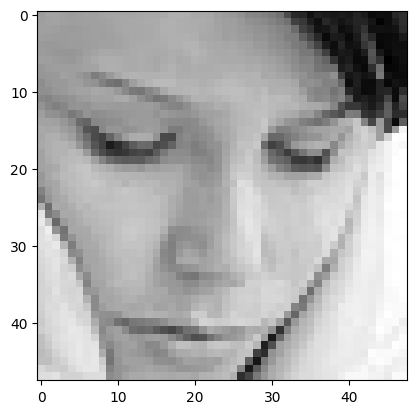

In [406]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')